In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )
df.shape

(1096, 5)

In [3]:
df.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


In [5]:
df['Class'].unique()

array([0, 1])

In [6]:
X = df.drop(columns = 'Class')
y = df['Class']

In [7]:
X.head()

,VWTI,SWTI,CWTI,EI
0,2.2634,-4.4862,3.6558,-0.612510
1,3.2718,1.7837,2.1161,0.613340
2,-3.9411,-12.8792,13.0597,-3.312500
3,0.5195,-3.2633,3.0895,-0.984900
4,2.5698,-4.4076,5.9856,0.078002


In [8]:
X[X.columns] = X[X.columns].astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
dtypes: float64(4)
memory usage: 34.4 KB


In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_features = sc.fit_transform(X)
X = pd.DataFrame(scaled_features,columns = X.columns)
X.head()

,VWTI,SWTI,CWTI,EI
0,0.636512,-1.058603,0.494384,0.261485
1,0.990172,0.000516,0.142345,0.849696
2,-1.539497,-2.476359,2.644506,-1.034076
3,0.024901,-0.852029,0.364904,0.082798
4,0.743971,-1.045326,1.027073,0.592820


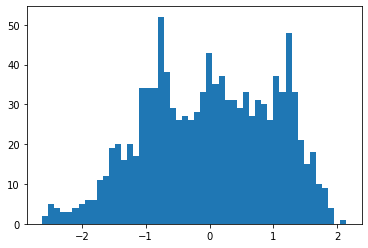

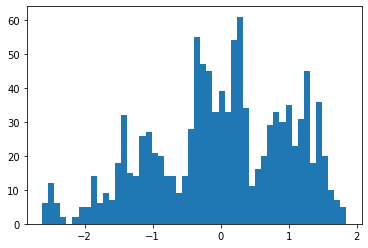

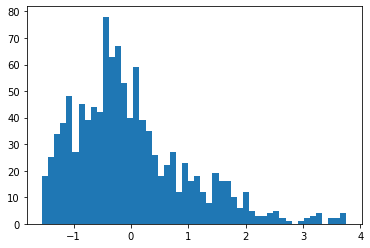

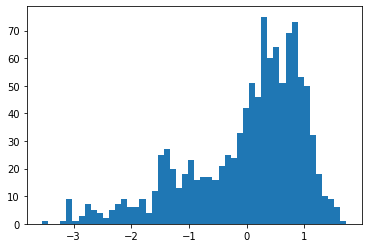

In [10]:
for features in X.columns:
  plt.hist(X[features],bins = 50)
  plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 17,stratify = y)

In [12]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,input_shape = (4,),activation = 'relu'),
                             tf.keras.layers.Dense(50,activation = 'relu'),
                             tf.keras.layers.Dense(10,activation = 'relu'),
                             tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,071
Trainable params: 6,071
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [14]:
X_train.shape

(822, 4)

In [15]:
y_train.shape

(822,)

In [16]:
model.fit(X_train,y_train,batch_size = 32,epochs = 20)

Epoch 1/20
26/26 [==============================] - 1s 4ms/step - loss: 0.5543 - accuracy: 0.8345
Epoch 2/20
26/26 [==============================] - 0s 3ms/step - loss: 0.2870 - accuracy: 0.9599
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1053 - accuracy: 0.9805
Epoch 4/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9842
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9903
Epoch 6/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0252 - accuracy: 0.9903
Epoch 7/20
26/26 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9951
Epoch 8/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 0.9988
Epoch 9/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9988
Epoch 10/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 11/20
26/26 [

In [17]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000


[0.0017600827850401402, 1.0]

In [18]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')
test_data.shape

(275, 4)

In [20]:
test = sc.transform(test_data)
test_data = pd.DataFrame(test,columns = test_data.columns)
test_data.head()

,VWTI,SWTI,CWTI,EI
0,-0.300401,-0.209210,-0.462035,0.871414
1,-1.461288,-1.738123,2.485212,0.097059
2,1.773037,1.450435,-1.350479,-1.374090
3,0.433623,1.177087,-0.630509,-0.109570
4,1.506214,0.055399,-0.310205,1.349190


In [21]:
y_pred = model.predict(test_data)

In [28]:
y_pred = np.round(pd.DataFrame(y_pred,columns = ['prediction']))


prediction
0.0           153
1.0           122
dtype: int64

In [30]:
from google.colab import files
y_pred.to_csv('submission.csv',index = False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>